<a href="https://colab.research.google.com/github/swatipc/DeepLearning/blob/master/DL_UngradedAssignment1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing packages
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [46]:
path = untar_data(URLs.FLOWERS); path

PosixPath('/root/.fastai/data/oxford-102-flowers')

In [47]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt')]

In [0]:
path_labels = path/'valid'
path_img = path/'jpg'

In [49]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07971.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_00920.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_01138.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07714.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_02016.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=16
                                  ).normalize(imagenet_stats)

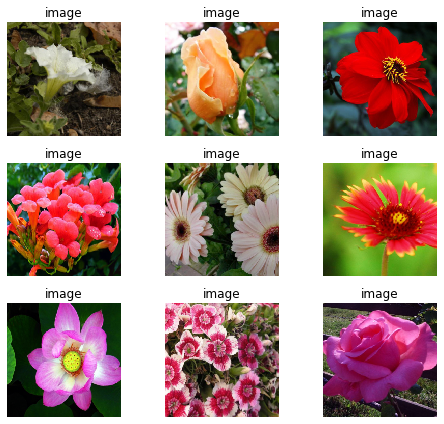

In [52]:
data.show_batch(rows=3, figsize=(7,6))

In [53]:
print(data.classes)
len(data.classes),data.c

['image']


(1, 1)

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [55]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [56]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,03:24
1,0.000000,0.000000,0.000000,03:19
2,0.000000,0.000000,0.000000,03:20
3,0.000000,0.000000,0.000000,03:23


In [0]:
learn.save('stage-1')

In [63]:
#Results
interpret = ClassificationInterpretation.from_learner(learn)

losses,idxs = interpret.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

IndexError: ignored

In [0]:
interpret.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interpret.plot_top_losses)

In [0]:
interpret.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interpret.most_confused(min_val=2)

In [0]:
#Unfreeze, Fine tune and finding learning rate
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
#Training RESNET50
my_data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(my_data, models.resnet50, metrics=error_rate)

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
learn.load('stage-1-50');

In [0]:
interpret = ClassificationInterpretation.from_learner(learn)

In [0]:
interpret.most_confused(min_val=2)

In [57]:
#Other data formats
path = untar_data(URLs.IMAGENETTE); path

PosixPath('/root/.fastai/data/imagenette2')

In [60]:
tfms = get_transforms(do_flip=False)
new_data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


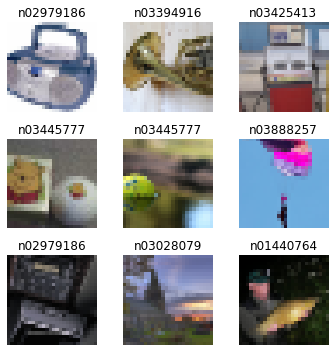

In [61]:
new_data.show_batch(rows=3, figsize=(5,5))

In [62]:
learn = cnn_learner(new_data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
